# Lab 5, Module 2: Sentence Embeddings & Semantic Search

**Estimated time:** 25 minutes

---

## From Words to Sentences: The Next Level

In Module 0, you embedded individual **words** using co-occurrence patterns.  
In Module 1, you explored **word-level relationships** using GloVe vectors.

**Now let's scale up again.**

In this module, you'll embed **entire sentences** and build a semantic search engine. This is how modern AI systems like ChatGPT, Google, and RAG (Retrieval-Augmented Generation) systems find relevant information.

### What You'll Learn

1. **Sentence embeddings** - How to represent whole sentences as vectors
2. **Semantic similarity** - Measuring how close two sentences are in meaning
3. **Semantic search** - Finding documents by meaning, not keywords
4. **Real-world applications** - How this powers modern AI systems

### The Model: all-MiniLM-L6-v2

You'll use a **SentenceTransformer** model called **all-MiniLM-L6-v2**:
- Trained specifically for sentence embeddings (not just words!)
- Produces **384-dimensional vectors** (vs GloVe's 50 dimensions)
- Small and fast, but powerful for semantic similarity tasks
- Used in production systems for document retrieval

**The key difference from word embeddings:** This model understands entire sentences as unified concepts, not just bags of words.

Let's get started!

In [1]:
# ============================================================
#  Module 2 — Setup & Why LLMs Need Embeddings
#  DATA 1010 – Artificial Intelligence in Action
# ============================================================

# This cell:
#   • Installs and loads a free, open-source embedding model
#   • Asks for a group code (like Labs 1–4)
#   • Generates a test embedding for a sample sentence
#   • Shows the embedding dimensionality
#   • Confirms the Colab environment is working

# -----------------------------
# 1. Install requirements
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
try:
    from sentence_transformers import SentenceTransformer
except ImportError:
    !pip install -q sentence-transformers
    from sentence_transformers import SentenceTransformer

# -----------------------------
# 2. Group Code
# -----------------------------
group_code = input("Enter your group code (an integer): ")
print(f"Group code set to: {group_code}")

# -----------------------------
# 3. Load the embedding model
# -----------------------------
print("\nLoading embedding model (all-MiniLM-L6-v2)...")
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
print("Model loaded successfully!")

# -----------------------------
# 4. Generate a test embedding
# -----------------------------
test_sentence = "Astronomy is the study of stars and galaxies."

print("\nGenerating a test embedding...")
embedding = model.encode(test_sentence)

print("\nSample sentence:")
print("   ", test_sentence)
print("\nEmbedding generated!")
print(f"Embedding vector length: {len(embedding)} dimensions")
print(f"First 10 values: {embedding[:10]}")

# -----------------------------
# Finished
# -----------------------------
print("\nSetup complete. You are ready for Module 2.")


Enter your group code (an integer): 123
Group code set to: 123

Loading embedding model (all-MiniLM-L6-v2)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model loaded successfully!

Generating a test embedding...

Sample sentence:
    Astronomy is the study of stars and galaxies.

Embedding generated!
Embedding vector length: 384 dimensions
First 10 values: [ 0.05037532  0.01330446 -0.01295629  0.07993419 -0.05665044 -0.05210425
 -0.04413004 -0.02720228  0.05187838  0.01133986]

Setup complete. You are ready for Module 2.


Sentences to embed:

1. The cat sat on the mat.
2. Cats are great pets.
3. Stars fuse hydrogen into helium.
4. Galaxies contain billions of stars.
5. Neural networks learn patterns.

Encoding sentences into embeddings...
Done!
Embedding array shape: (5, 384)  (sentences x dimensions)

Notice: Each sentence becomes a 384-dimensional vector!
(Compare to GloVe's 50 dimensions for individual words)

PCA complete. Showing 2D coordinates for each sentence:
1. (-0.693, 0.180)
2. (-0.518, 0.060)
3. (0.508, 0.426)
4. (0.513, 0.201)
5. (0.189, -0.867)


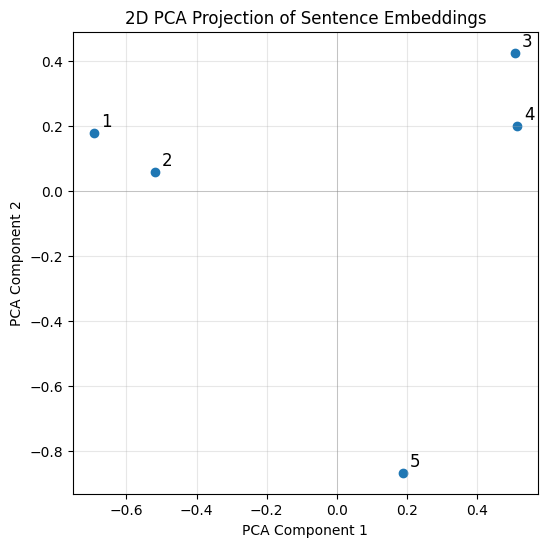


Each point is one sentence. The numbers match the list above.

Observe:
  • Which sentences are closest together?
  • Do the clusters match your intuition about meaning?
  • Why might some sentences sit apart from the others?


In [2]:
# ============================================================
#  Module 2 — Activity 1: Sentence Embeddings Visualization
#  DATA 1010 – Artificial Intelligence in Action
# ============================================================

# This cell:
#   • Defines a small set of sentences
#   • Uses the embedding model to encode them
#   • Reduces embeddings to 2D using PCA
#   • Plots the sentences as points in a 2D "meaning space"



# -----------------------------
# 1. Define the sentences
# -----------------------------
sentences = [
    "The cat sat on the mat.",
    "Cats are great pets.",
    "Stars fuse hydrogen into helium.",
    "Galaxies contain billions of stars.",
    "Neural networks learn patterns."
]

print("Sentences to embed:\n")
for i, s in enumerate(sentences, start=1):
    print(f"{i}. {s}")
print("\nEncoding sentences into embeddings...")

# -----------------------------
# 2. Encode sentences
# -----------------------------
# Uses the SentenceTransformer model loaded in setup
embeddings = model.encode(sentences)
embeddings = np.array(embeddings)

print("Done!")
print(f"Embedding array shape: {embeddings.shape}  (sentences x dimensions)")
print(f"\nNotice: Each sentence becomes a {embeddings.shape[1]}-dimensional vector!")
print("(Compare to GloVe's 50 dimensions for individual words)")

# -----------------------------
# 3. Reduce to 2D with PCA
# -----------------------------
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

print("\nPCA complete. Showing 2D coordinates for each sentence:")
for i, (x, y) in enumerate(embeddings_2d, start=1):
    print(f"{i}. ({x:.3f}, {y:.3f})")

# -----------------------------
# 4. Plot the 2D embedding space
# -----------------------------
plt.figure(figsize=(6, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, (x, y) in enumerate(embeddings_2d):
    label = f"{i+1}"
    plt.text(x + 0.02, y + 0.02, label, fontsize=12)

plt.title("2D PCA Projection of Sentence Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.axhline(0, linewidth=0.5, color='gray', alpha=0.5)
plt.axvline(0, linewidth=0.5, color='gray', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.show()

print("\n" + "="*50)
print("Each point is one sentence. The numbers match the list above.")
print("="*50)
print("\nObserve:")
print("  • Which sentences are closest together?")
print("  • Do the clusters match your intuition about meaning?")
print("  • Why might some sentences sit apart from the others?")


---

## Activity 1: Visualizing Sentence Embeddings

Now that the model is loaded, let's embed a few sentences and see how they cluster in meaning space.

### 📝 Question 16 (Prediction)

Before running the code below, look at these 5 sentences:

1. "The cat sat on the mat."
2. "Cats are great pets."
3. "Stars fuse hydrogen into helium."
4. "Galaxies contain billions of stars."
5. "Neural networks learn patterns."

**Q16.** Which two sentences do you predict will be closest together in the embedding space? Why?

*Think about: Which sentences have the most similar meanings?*

**Write your prediction in the answer sheet, then run the code to check!**

---

In [5]:
# ============================================================
#  Module 2 — Activity 2: Cosine Similarity Exploration
#  DATA 1010 – Artificial Intelligence in Action
# ============================================================

# This cell:
#   • Lets you choose any two sentences from Activity 1
#   • Computes cosine similarity + distance
#   • Highlights the two chosen points on the PCA plot
#   • Helps you compare intuition vs measurable similarity

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# ---------------------------------------
# 1. Dropdown menus for sentence selection
# ---------------------------------------
sentence_options = [f"{i+1}. {sentences[i]}" for i in range(len(sentences))]

dropdown1 = widgets.Dropdown(
    options=sentence_options,
    description='Sentence 1:',
    style={'description_width': 'initial'},
    value=sentence_options[0]
)

dropdown2 = widgets.Dropdown(
    options=sentence_options,
    description='Sentence 2:',
    style={'description_width': 'initial'},
    value=sentence_options[1]
)

display(dropdown1)
display(dropdown2)

# ---------------------------------------
# 2. Button to run the comparison
# ---------------------------------------
button = widgets.Button(description="Compute Similarity", button_style='info')
output = widgets.Output()
display(button, output)

# ---------------------------------------
# 3. Callback function for button press
# ---------------------------------------
def on_button_clicked(b):
    with output:
        output.clear_output()

        # Extract indices
        idx1 = int(dropdown1.value.split(".")[0]) - 1
        idx2 = int(dropdown2.value.split(".")[0]) - 1

        emb1 = embeddings[idx1].reshape(1, -1)
        emb2 = embeddings[idx2].reshape(1, -1)

        sim = cosine_similarity(emb1, emb2)[0][0]
        dist = 1 - sim

        print("===============================================")
        print("Sentence 1:")
        print("  ", sentences[idx1], "\n")
        print("Sentence 2:")
        print("  ", sentences[idx2])
        print("===============================================\n")

        print(f"Cosine Similarity: {sim:.4f}")
        print(f"Cosine Distance:   {dist:.4f}\n")

        # Interpretation
        if sim > 0.8:
            print("Interpretation: Very similar meaning")
        elif sim > 0.6:
            print("Interpretation: Related meanings")
        elif sim > 0.4:
            print("Interpretation: Somewhat related")
        else:
            print("Interpretation: Different meanings")

        # ---------------------------------------
        # Visualize the two points on the PCA scatterplot
        # ---------------------------------------
        plt.figure(figsize=(6, 6))
        plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='gray', alpha=0.6)

        # Highlight selected points
        plt.scatter(embeddings_2d[idx1, 0], embeddings_2d[idx1, 1], color='red', s=120, label="Sentence 1", zorder=5)
        plt.scatter(embeddings_2d[idx2, 0], embeddings_2d[idx2, 1], color='blue', s=120, label="Sentence 2", zorder=5)

        # Labels for all points
        for i, (x, y) in enumerate(embeddings_2d):
            plt.text(x + 0.02, y + 0.02, str(i+1), fontsize=10)

        plt.title("PCA Visualization of Selected Sentences")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

button.on_click(on_button_clicked)

print("\nSelect two sentences and click 'Compute Similarity' to compare them!")

Dropdown(description='Sentence 1:', options=('1. The cat sat on the mat.', '2. Cats are great pets.', '3. Star…

Dropdown(description='Sentence 2:', index=1, options=('1. The cat sat on the mat.', '2. Cats are great pets.',…

Button(button_style='info', description='Compute Similarity', style=ButtonStyle())

Output()


Select two sentences and click 'Compute Similarity' to compare them!


---

## 📝 Questions 17-18 (Observation & Analysis)

**Q17.** After viewing the PCA visualization above, which sentences clustered together? Was your prediction from Q16 correct?

**Q18.** Why is "Neural networks learn patterns" isolated from the other sentences in the PCA plot?

*Think about: What topics do the other sentences share? What makes the neural networks sentence different?*

*Record your answers in the answer sheet.*

---

## Activity 2: Exploring Cosine Similarity

Now let's measure exactly how similar different sentence pairs are using cosine similarity.

**Interpretation guide for cosine similarity:**
- **> 0.8:** Very similar meaning
- **0.6 - 0.8:** Related meanings
- **0.4 - 0.6:** Somewhat related
- **< 0.4:** Different meanings

Use the dropdown menus below to compare any two sentences!

---

Our corpus has 20 sentences.
Topics: Astronomy, Pets/Animals, Machine Learning, Miscellaneous

Encoding corpus sentences into embeddings...
Done. Shape: (20, 384) (sentences x dimensions)

Enter a natural-language query to search the corpus by meaning.
Example queries:
  • objects that orbit the sun
  • examples of nuclear fusion
  • animals people keep at home
  • how machines learn patterns

Type your query here: animals on a farm

Embedding your query...

 SEMANTIC SEARCH RESULTS

Your query:
   animals on a farm 

Top 3 most similar sentences in the corpus:

1. [Corpus sentence 6]  (similarity = 0.3352)
    Dogs are loyal animals that enjoy walks. 

2. [Corpus sentence 9]  (similarity = 0.2995)
    Hamsters often run on wheels in their cages. 

3. [Corpus sentence 8]  (similarity = 0.2185)
    Birds can be trained to mimic human speech. 



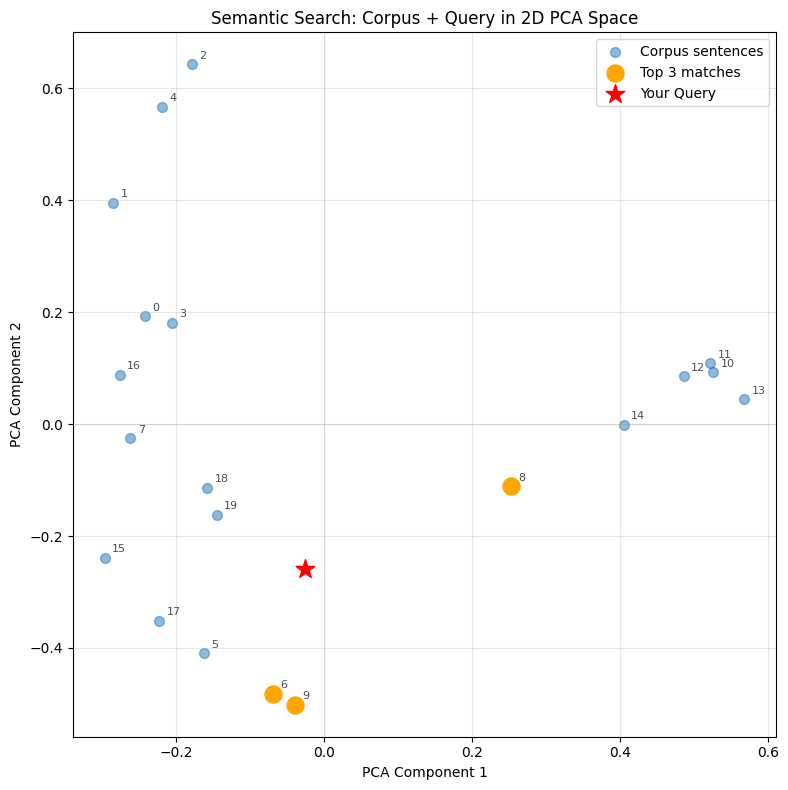


Visualization Guide:
  • Gray dots = corpus sentences (labeled by index)
  • Orange dots = your top 3 matches
  • Red star = your query

Notice how the query (red star) is close to the orange matches!
This is semantic search in action: finding meaning, not keywords.


In [4]:
#@title ### 🔎 Activity 3: Semantic Search Mini-Application

# # Module 3 — Semantic Search Mini-Application
# In this activity, you'll build a tiny **semantic search engine** using the same
# embedding model from earlier in the lab.
#
# Instead of searching by keywords, you'll search by **meaning**:
#
# 1. Embed a small corpus of mixed-topic sentences.
# 2. Embed a **user query** (in natural language).
# 3. Compute cosine similarities between the query and all corpus sentences.
# 4. Show the **top 3 most similar** sentences.
# 5. Visualize the query in the same 2D PCA space as the corpus.
#
# Try queries like:
# - "objects that orbit the sun"
# - "examples of nuclear fusion"
# - "animals people keep at home"
# - "how machines learn patterns"

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# ------------------------------------------------
# 1. Define a small mixed-topic corpus
# ------------------------------------------------
corpus = [
    # Astronomy-related
    "The Earth orbits the Sun once every year.",
    "Stars fuse hydrogen into helium in their cores.",
    "Galaxies contain billions of stars.",
    "The Moon causes tides in the oceans.",
    "Telescopes help astronomers observe distant galaxies.",

    # Pets / animals
    "Cats are popular pets that like to nap.",
    "Dogs are loyal animals that enjoy walks.",
    "Many people keep fish in aquariums at home.",
    "Birds can be trained to mimic human speech.",
    "Hamsters often run on wheels in their cages.",

    # Machine learning / AI
    "Neural networks learn patterns from data.",
    "Machine learning models can recognize images.",
    "Large language models generate human-like text.",
    "Training a model requires lots of examples.",
    "Embeddings represent meaning as high-dimensional vectors.",

    # Miscellaneous
    "Cooking at home can be fun and relaxing.",
    "Music concerts bring people together.",
    "Running is a good form of exercise.",
    "Libraries are quiet places to read and study.",
    "Video games can be played with friends online."
]

print("Our corpus has", len(corpus), "sentences.")
print("Topics: Astronomy, Pets/Animals, Machine Learning, Miscellaneous\n")

# ------------------------------------------------
# 2. Embed the corpus
# ------------------------------------------------
print("Encoding corpus sentences into embeddings...")
corpus_embeddings = model.encode(corpus)
corpus_embeddings = np.array(corpus_embeddings)
print("Done. Shape:", corpus_embeddings.shape, "(sentences x dimensions)")

# ------------------------------------------------
# 3. Fit PCA on the corpus for 2D visualization
# ------------------------------------------------
pca_corpus = PCA(n_components=2)
corpus_2d = pca_corpus.fit_transform(corpus_embeddings)

# ------------------------------------------------
# 4. Get a user query and embed it
# ------------------------------------------------
print("\nEnter a natural-language query to search the corpus by meaning.")
print("Example queries:")
print("  • objects that orbit the sun")
print("  • examples of nuclear fusion")
print("  • animals people keep at home")
print("  • how machines learn patterns\n")

query = input("Type your query here: ").strip()
if not query:
    query = "objects that orbit the sun"
    print(f"(No input detected. Using default query: '{query}')")

print("\nEmbedding your query...")
query_embedding = model.encode([query])
query_2d = pca_corpus.transform(query_embedding)  # project into same PCA space

# ------------------------------------------------
# 5. Compute cosine similarity and get top 3 results
# ------------------------------------------------
sims = cosine_similarity(query_embedding, corpus_embeddings)[0]  # shape: (N,)
top_indices = np.argsort(sims)[::-1][:3]  # indices of top 3

print("\n" + "="*60)
print(" SEMANTIC SEARCH RESULTS")
print("="*60)
print("\nYour query:")
print("  ", query, "\n")
print("Top 3 most similar sentences in the corpus:\n")

for rank, idx in enumerate(top_indices, start=1):
    print(f"{rank}. [Corpus sentence {idx}]  (similarity = {sims[idx]:.4f})")
    print("   ", corpus[idx], "\n")

# ------------------------------------------------
# 6. Visualize corpus + query in PCA space
# ------------------------------------------------
plt.figure(figsize=(8, 8))

# Plot corpus points
plt.scatter(corpus_2d[:, 0], corpus_2d[:, 1], alpha=0.5, s=50, label="Corpus sentences")

# Highlight top 3
plt.scatter(corpus_2d[top_indices, 0], corpus_2d[top_indices, 1],
            color="orange", s=150, label="Top 3 matches", zorder=4)

# Plot query
plt.scatter(query_2d[0, 0], query_2d[0, 1], color="red", s=200, marker='*',
            label="Your Query", zorder=5)

# Label corpus points (indices)
for i, (x, y) in enumerate(corpus_2d):
    plt.text(x + 0.01, y + 0.01, str(i), fontsize=8, alpha=0.7)

plt.title("Semantic Search: Corpus + Query in 2D PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.axhline(0, linewidth=0.5, color='gray', alpha=0.3)
plt.axvline(0, linewidth=0.5, color='gray', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Visualization Guide:")
print("  • Gray dots = corpus sentences (labeled by index)")
print("  • Orange dots = your top 3 matches")
print("  • Red star = your query")
print("="*60)
print("\nNotice how the query (red star) is close to the orange matches!")
print("This is semantic search in action: finding meaning, not keywords.")


---

## 📝 Questions 21-24 (Application & Synthesis)

**Q21.** In the semantic search activity above, what query did you test? What were the top 3 results?

*Write down your query and the 3 sentences it returned.*

**Q22.** Do the top 3 results make sense for your query? Would keyword search have found these sentences?

*Think about: Did your query use the exact same words as the results, or did it find them by meaning?*

**Q23.** How is semantic search different from searching with Ctrl+F (keyword search)? Give a specific example from your results.

**Q24.** Reflecting on all three modules: How do embeddings allow AI systems like ChatGPT to "understand" the meaning of text rather than just matching keywords?

*Think about the journey:*
- *Module 0: Co-occurrence captures context*
- *Module 1: Word relationships preserved as geometry*
- *Module 2: Sentences embedded in meaning space*
- *How does this all come together for LLMs?*

*Record your answers in the answer sheet.*

---

## ✅ Module 2 Complete! Lab 5 Finished!

Congratulations! You've completed the full journey through embeddings:

### What You've Learned

**Module 0:**
- Built a tiny embedding system from scratch
- Learned how co-occurrence creates meaning vectors
- Visualized word clusters with PCA

**Module 1:**
- Explored professional GloVe embeddings (6 billion tokens!)
- Discovered dimensions capture abstract concepts
- Used vector arithmetic to solve analogies

**Module 2:**
- Embedded entire sentences (not just words!)
- Measured semantic similarity with cosine distance
- Built a semantic search engine by meaning

### The Big Picture: Why This Matters

**Embeddings are the foundation of modern AI:**

1. **Search & Retrieval** - Google, Bing, and specialized search use semantic embeddings
2. **RAG Systems** - ChatGPT and Claude use embeddings to find relevant context from documents
3. **Recommendation** - Netflix, Spotify, Amazon use embeddings to find similar content
4. **Translation** - Translating between languages by mapping to shared embedding space
5. **Classification** - Spam detection, sentiment analysis, topic categorization
6. **Clustering** - Grouping similar documents, detecting duplicates
7. **Question Answering** - Finding answers in knowledge bases

**The key insight:** By representing language as geometry, AI systems can compute with meaning instead of just matching text patterns.

### Optional: Module 3 - RAG in Practice

If your instructor assigns it, **Module 3** explores Retrieval-Augmented Generation (RAG) using lmnotebook. You'll see how semantic search integrates with LLMs to create systems that can answer questions using retrieved context.

### What's Next?

You now understand the representation layer that powers modern NLP. Future topics might include:
- **Attention mechanisms** - How transformers weigh different parts of text
- **Transfer learning** - Fine-tuning pre-trained models for specific tasks
- **Multimodal embeddings** - Representing images, audio, and text in the same space

**Excellent work!** You've gone from basic co-occurrence matrices to understanding the geometry of meaning that powers billion-parameter AI systems.

---

## 📝 Questions 19-20 (Experimentation)

Use the dropdown tool above to answer these questions:

**Q19.** Compare "The cat sat on the mat." with "Cats are great pets." What is their cosine similarity? Are they similar or different?

**Q20.** Now compare "Stars fuse hydrogen into helium." with "Galaxies contain billions of stars." What is their cosine similarity? Is it higher or lower than the cat sentences? Why?

*Hint: Think about what the sentences have in common—specific topics vs general relatedness.*

*Record your answers (including the similarity values) in the answer sheet.*

---

## Activity 3: Semantic Search Mini-Application

Now for the exciting part! You'll build a tiny semantic search engine that finds documents by **meaning**, not keywords.

**How it works:**
1. Embed a corpus of 20 mixed-topic sentences
2. Embed your natural language query
3. Compute cosine similarities between query and all corpus sentences
4. Return the top 3 most similar sentences
5. Visualize everything in 2D PCA space

**Why this matters:**
- This is how **Google Search** improved beyond keyword matching
- This is the foundation of **RAG (Retrieval-Augmented Generation)** systems
- This is how **ChatGPT** and **Claude** find relevant context from documents
- This powers **recommendation systems** (Netflix, Spotify, Amazon)

Let's try it!